In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import yfinance as yf

In [22]:
stocks = input("Enter the code symbol of the stock : ")
data = yf.download(stocks, start="2008-01-01", end="2021-01-18", auto_adjust=True)
print(data.shape)

[*********************100%***********************]  1 of 1 completed

(3282, 5)


In [23]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
Date,,,,,
2008-01-02,7.850,7.876,7.564,7.572,68553
2008-01-03,7.674,7.980,7.610,7.873,72742
2008-01-04,7.841,7.859,7.500,7.652,61496
2008-01-07,7.879,7.940,7.701,7.803,56675
2008-01-08,7.967,7.997,7.880,7.909,53775


In [24]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.707074,3.787288,3.635038,3.713705,131397.603595
std,1.825297,1.865744,1.789584,1.830425,54393.040171
min,1.482000,1.567000,1.432000,1.441000,0.000000
25%,2.693000,2.736500,2.644000,2.691250,91744.250000
50%,3.240500,3.312000,3.183500,3.253000,126669.500000
75%,4.152000,4.244750,4.066750,4.157750,161490.500000
max,13.577000,13.694000,13.306000,13.580000,459196.000000


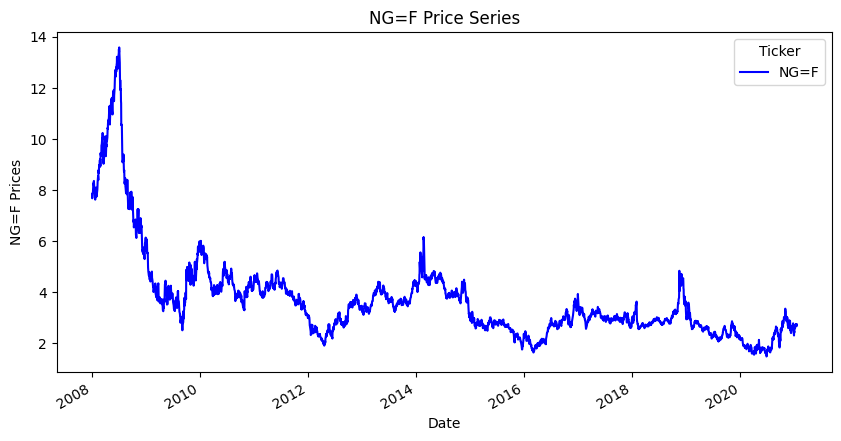

In [25]:
data.Close.plot(figsize = (10,5), color = 'blue')
plt.title("{} Price Series".format(stocks))
plt.ylabel('{} Prices'.format(stocks))
plt.show() 

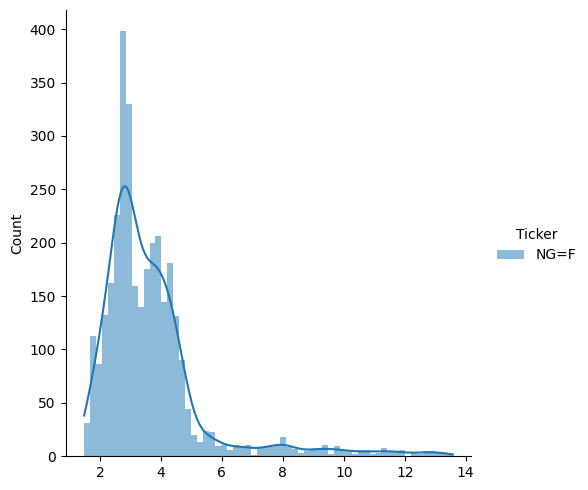

In [26]:
sns.displot(data['Close'],edgecolor = None, kde=True);

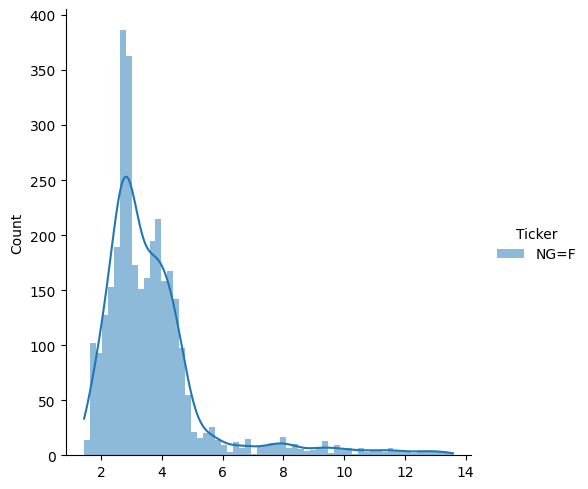

In [27]:
sns.displot(data['Open'],edgecolor = None, kde=True);


## Conclusion

#### Shape of the data 
#### How data is distributed
#### It’s very very non linear

Therefore we can use Linear, Logistic, Regularized, SVM



In [30]:
X = data.drop('Close', axis=1)
Y = data['Close']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2625, 4) (657, 4) (2625, 1) (657, 1)


Basic Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse_linearreg = mean_squared_error(Y_test, Y_pred)
r2_score_linearreg = r2_score(Y_test, Y_pred)

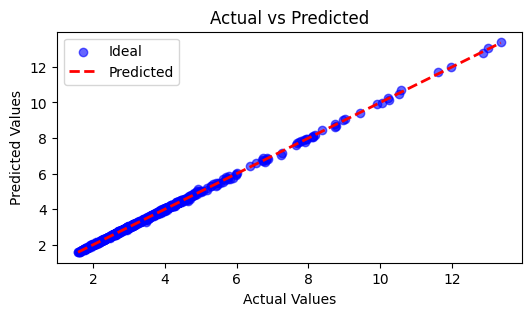

In [36]:
plt.figure(figsize=(6,3))
plt.scatter(Y_test, Y_pred, alpha=0.6, color="blue")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # reference line
plt.legend(['Ideal', 'Predicted'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


LASSO AND RIDGE (REGULARIZATION)

In [40]:
from sklearn.linear_model import Lasso, Ridge
la  = Lasso()
ri = Ridge()
la.fit(X_train, Y_train)
ri.fit(X_train, Y_train)
Y_pred_la = la.predict(X_test)
Y_pred_ri = ri.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse_lasso = mean_squared_error(Y_test, Y_pred_la)
r2_score_lasso = r2_score(Y_test, Y_pred_la)
mse_ridge = mean_squared_error(Y_test, Y_pred_ri)
r2_score_ridge = r2_score(Y_test, Y_pred_ri)

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Grid Search
params_grid = {"C": [0.1, 1, 10, 100], "gamma": ['scale', 'auto'], "kernel": ['rbf']}
grid = GridSearchCV(SVR(), params_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train.to_numpy().ravel())

# Best model from GridSearch
print("Best Params:", grid.best_params_)
Y_pred_svr = grid.predict(X_test)

mse_grid = mean_squared_error(Y_test, Y_pred_svr)
r2_score_grid = r2_score(Y_test, Y_pred_svr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.075 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.089 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.077 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.079 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.090 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.075 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.070 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.049 total time=   0.1s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.077 total time=   0.1s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;,

In [ ]:
# OR manually define SVR with chosen params
svr = SVR(C=100, gamma=0.01, kernel='rbf')
svr.fit(X_train, Y_train.to_numpy().ravel())
Y_pred_svr = svr.predict(X_test)

mse_svr = mean_squared_error(Y_test, Y_pred_svr)
r2_score_svr = r2_score(Y_test, Y_pred_svr)